<a href="https://colab.research.google.com/github/VIGNESHMADAN/1BM22AI151_AGA_LAB/blob/main/Copy_of_AGA_LAB_ALL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

469/469 ━━━━━━━━━━━━━━━━━━━━ 104s 216ms/step - loss: 0.2367 - val_loss: 0.0812
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


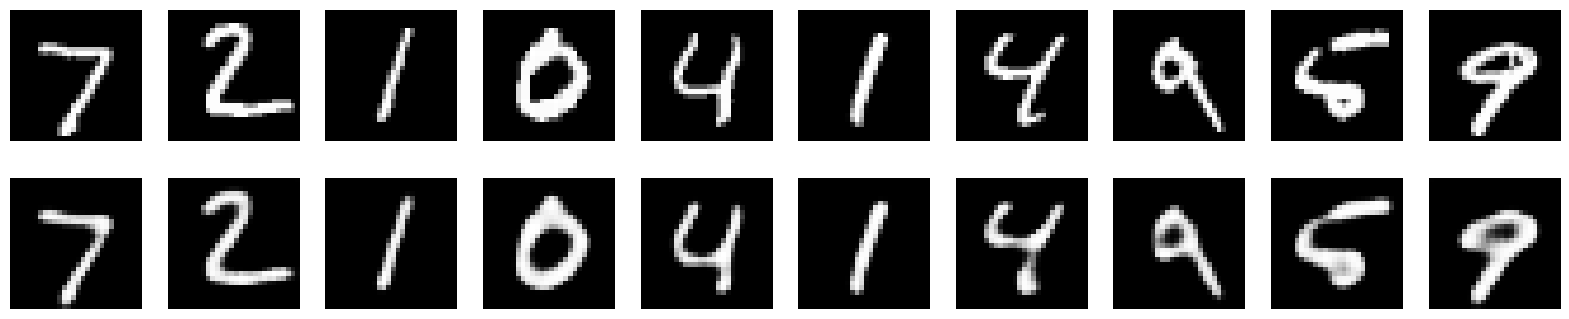

In [ ]:
#undercomplete
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

# Load and preprocess data
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[..., np.newaxis] / 255.0
x_test = x_test[..., np.newaxis] / 255.0

# Autoencoder model
input_img = layers.Input((28, 28, 1))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x = layers.MaxPooling2D(2, padding='same')(x)
x = layers.Conv2D(16, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.UpSampling2D(2)(x)
decoded = layers.Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train
autoencoder.fit(x_train, x_train, epochs=1, batch_size=128,
                shuffle=True, validation_data=(x_test, x_test))

# Predict
reconstructed = autoencoder.predict(x_test[:10])

# Display original and reconstructed images
plt.figure(figsize=(20, 4))
for i in range(10):
    for j, img in enumerate([x_test[i], reconstructed[i]]):
        ax = plt.subplot(2, 10, i + 1 + j * 10)
        plt.imshow(img.squeeze(), cmap='gray')
        plt.axis('off')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


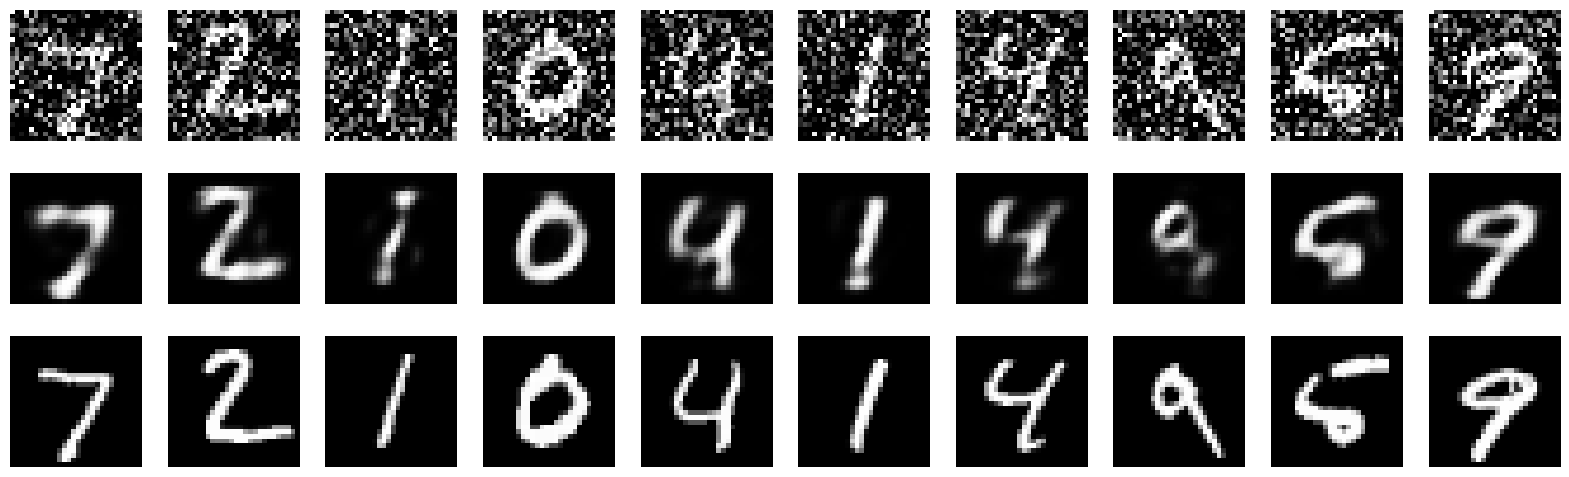

In [ ]:
#denoising
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models

# Load and normalize MNIST
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 784).astype("float32") / 255.
x_test = x_test.reshape(-1, 784).astype("float32") / 255.

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Autoencoder model
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(32, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train on noisy input but target is clean
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                verbose=0)

# Predict denoised images
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize noisy vs denoised
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy input
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Clean reconstruction
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Original clean image
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()



In [ ]:
#stackedrbm
from sklearn.datasets import load_digits
from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Load and preprocess data
X, y = load_digits(return_X_y=True)
X /= 16.0  # Normalize to [0, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build stacked RBM pipeline
model = Pipeline([
    ('rbm1', BernoulliRBM(n_components=64, learning_rate=0.06, n_iter=20, random_state=0)),
    ('rbm2', BernoulliRBM(n_components=32, learning_rate=0.06, n_iter=20, random_state=0)),
    ('logistic', LogisticRegression(max_iter=1500))
])

# Train and evaluate
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Show sample predictions
print("\n--- First 20 Predictions ---")
for i in range(20):
    print(f"Actual: {y_test[i]} | Predicted: {y_pred[i]}")



--- Classification Report ---
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        33
           1       0.73      0.79      0.76        28
           2       0.88      0.85      0.86        33
           3       0.79      0.76      0.78        34
           4       0.96      1.00      0.98        46
           5       0.81      0.72      0.76        47
           6       0.97      0.97      0.97        35
           7       0.81      0.88      0.85        34
           8       0.77      0.57      0.65        30
           9       0.59      0.72      0.65        40

    accuracy                           0.82       360
   macro avg       0.83      0.82      0.82       360
weighted avg       0.83      0.82      0.82       360


--- First 20 Predictions ---
Actual: 6 | Predicted: 6
Actual: 9 | Predicted: 9
Actual: 3 | Predicted: 3
Actual: 7 | Predicted: 7
Actual: 2 | Predicted: 2
Actual: 1 | Predicted: 2
Actual: 5 | Predicted: 5
Actua

100%|██████████| 9.91M/9.91M [00:00<00:00, 116MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 13.2MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 97.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 7.22MB/s]


Training...
Epoch 1 complete
Epoch 2 complete
Epoch 3 complete
Epoch 4 complete
Epoch 5 complete
Test Accuracy: 97.67%


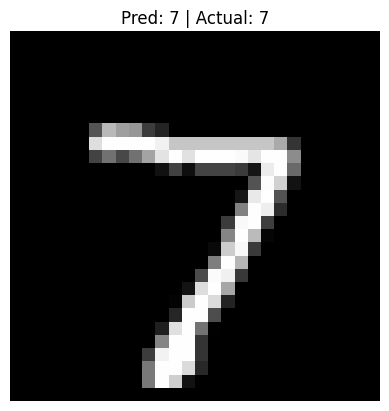

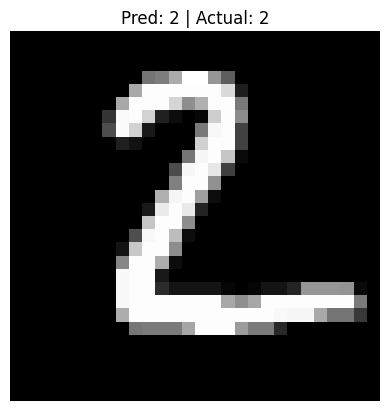

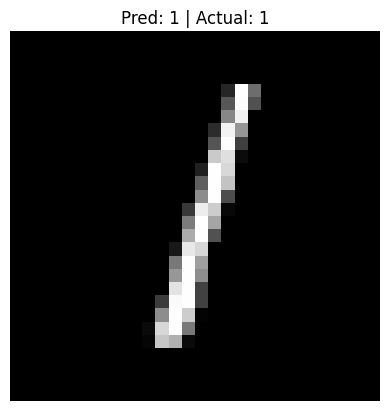

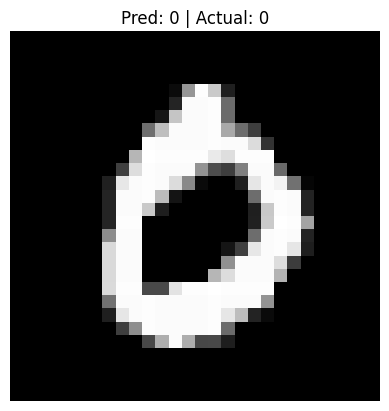

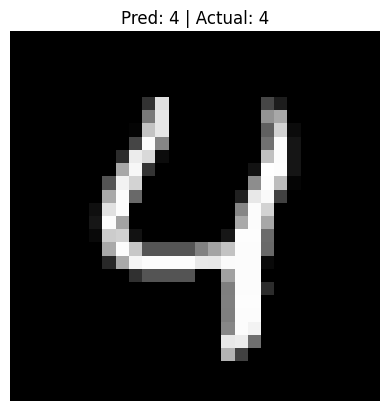

In [ ]:
#dbnimageclassification
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load data
transform = transforms.ToTensor()
train_loader = DataLoader(datasets.MNIST('./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(datasets.MNIST('./data', train=False, download=True, transform=transform), batch_size=1000)

# Define model
class SimpleMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(784, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
    def forward(self, x):
        return self.fc(x.view(-1, 28*28))

model = SimpleMLP()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()

# Training
print("Training...")
for epoch in range(5):
    for imgs, labels in train_loader:
        preds = model(imgs)
        loss = loss_fn(preds, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1} complete")

# Testing
model.eval()
correct = total = 0
with torch.no_grad():
    for imgs, labels in test_loader:
        preds = model(imgs).argmax(1)
        correct += (preds == labels).sum().item()
        total += labels.size(0)
print(f"Test Accuracy: {100 * correct / total:.2f}%")

# Predict 5 test images
images, labels = next(iter(test_loader))
with torch.no_grad():
    preds = model(images[:5]).argmax(1)

for i in range(5):
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f"Pred: {preds[i].item()} | Actual: {labels[i].item()}")
    plt.axis('off')
    plt.show()


In [ ]:
#DBM
import numpy as np

def sigmoid(x): return 1 / (1 + np.exp(-x))
def sample(prob): return np.random.binomial(1, prob)
def sample_layer(x, W, b):
    prob = sigmoid(np.dot(x, W) + b)
    return sample(prob), prob

def dbm_step(v, W1, b1, W2, b2, lr=0.01):
    h1, _ = sample_layer(v, W1, b1)
    h2, h2_prob = sample_layer(h1, W2, b2)
    h1_rec, _ = sample_layer(h2, W2.T, np.zeros_like(b1))
    v_rec, _ = sample_layer(h1_rec, W1.T, np.zeros_like(v))

    W1 += lr * (np.outer(v, h1) - np.outer(v_rec, h1_rec))
    W2 += lr * (np.outer(h1, h2) - np.outer(h1_rec, h2))
    b1 += lr * (h1 - h1_rec)
    b2 += lr * (h2 - h2_prob)
    return W1, b1, W2, b2

# Initialize
np.random.seed(42)
v = np.array([1, 0, 1, 0])
W1, b1 = np.random.randn(4, 3) * 0.1, np.zeros(3)
W2, b2 = np.random.randn(3, 2) * 0.1, np.zeros(2)

# Training step
W1, b1, W2, b2 = dbm_step(v, W1, b1, W2, b2)

print("W1:\n", W1, "\nb1:", b1, "\nW2:\n", W2, "\nb2:", b2)


W1:
 [[ 0.05967142 -0.01382643  0.07476885]
 [ 0.15230299 -0.02341534 -0.0234137 ]
 [ 0.16792128  0.07674347 -0.03694744]
 [ 0.054256   -0.05634177 -0.04657298]] 
b1: [0.01 0.   0.01] 
W2:
 [[ 0.03419623 -0.19132802]
 [-0.17249178 -0.05622875]
 [-0.09128311  0.03142473]] 
b2: [ 0.00562073 -0.00446176]


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


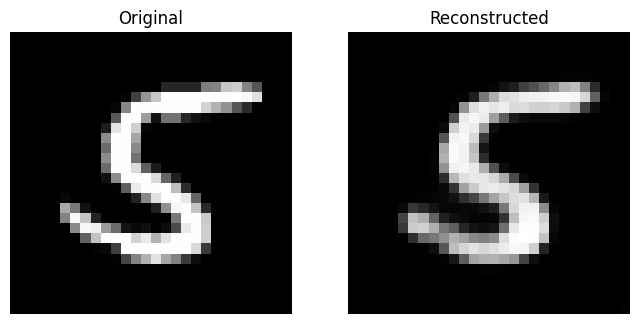

MSE: 0.007943


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from sklearn.metrics import mean_squared_error

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train.astype('float32') / 255, x_test.astype('float32') / 255
x_train, x_test = x_train[..., None], x_test[..., None]

# Define model
model = Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(28,28,1)),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    MaxPooling2D(2, padding='same'),
    Conv2D(16, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(32, 3, activation='relu', padding='same'),
    UpSampling2D(2),
    Conv2D(1, 3, activation='sigmoid', padding='same')
])
model.compile(optimizer='adam', loss='binary_crossentropy')
model.fit(x_train, x_train, epochs=1, batch_size=256, validation_data=(x_test, x_test), verbose=0)

# Predict and visualize
idx = np.random.randint(len(x_test))
pred = model.predict(x_test[idx:idx+1])[0]

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(x_test[idx].squeeze(), cmap='gray')
plt.axis('off')
plt.subplot(1,2,2)
plt.title("Reconstructed")
plt.imshow(pred.squeeze(), cmap='gray')
plt.axis('off')
plt.show()

# Calculate MSE
mse = mean_squared_error(x_test[idx].flatten(), pred.flatten())
print(f"MSE: {mse:.6f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


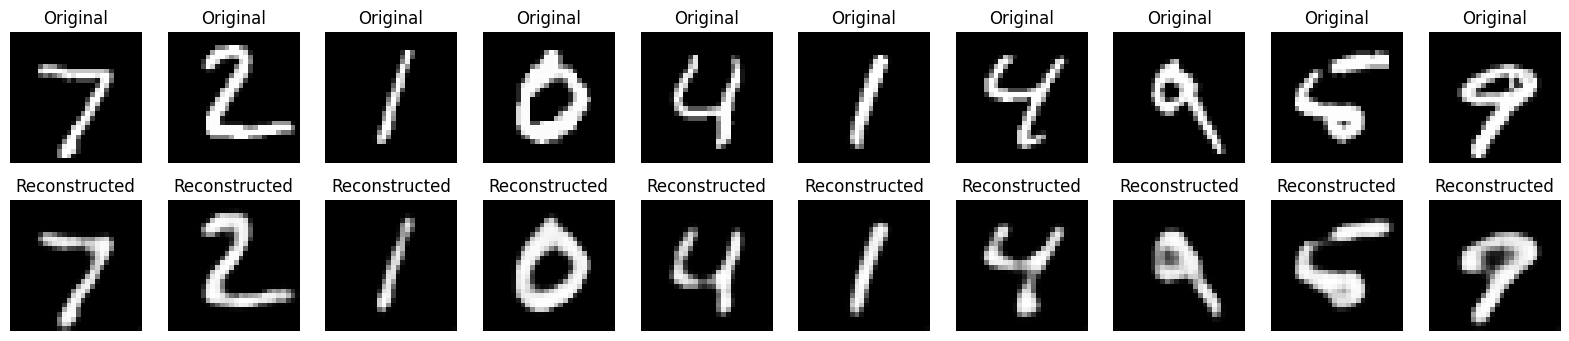

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

# Load and preprocess data
(x_train, _), (x_test, _) = mnist.load_data()
x_train, x_test = x_train[..., None]/255., x_test[..., None]/255.

# Build model
input_img = Input((28,28,1))
x = Conv2D(16, 3, activation='relu', padding='same')(input_img)
x = MaxPooling2D(2, padding='same')(x)
x = Conv2D(8, 3, activation='relu', padding='same')(x)
encoded = MaxPooling2D(2, padding='same')(x)

x = Conv2D(8, 3, activation='relu', padding='same')(encoded)
x = UpSampling2D(2)(x)
x = Conv2D(16, 3, activation='relu', padding='same')(x)
x = UpSampling2D(2)(x)
decoded = Conv2D(1, 3, activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile('adam', 'binary_crossentropy')
autoencoder.fit(x_train, x_train, epochs=1, batch_size=128,
                validation_data=(x_test, x_test), verbose=0)

# Predict and plot
decoded_imgs = autoencoder.predict(x_test)
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(x_test[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("Original")
    plt.subplot(2,10,i+11)
    plt.imshow(decoded_imgs[i].squeeze(), cmap='gray')
    plt.axis('off')
    plt.title("Reconstructed")
plt.show()


100%|██████████| 9.91M/9.91M [00:00<00:00, 129MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 25.5MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 84.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 6.12MB/s]


Epoch 1: D_loss=0.954, G_loss=1.112
Epoch 2: D_loss=1.190, G_loss=0.976
Epoch 3: D_loss=1.296, G_loss=0.876
Epoch 4: D_loss=0.767, G_loss=1.523
Epoch 5: D_loss=1.012, G_loss=1.167


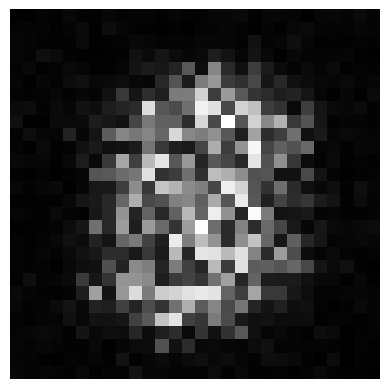

In [ ]:
#GAN
import torch, torch.nn as nn, torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# DataLoader
data = DataLoader(datasets.MNIST('.', train=True, download=True,
                                transform=transforms.Compose([
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5,), (0.5,))
                                ])),
                  batch_size=64, shuffle=True)

# Models
G = nn.Sequential(nn.Linear(100, 256), nn.ReLU(), nn.Linear(256, 784), nn.Tanh())
D = nn.Sequential(nn.Linear(784, 256), nn.LeakyReLU(0.2), nn.Linear(256, 1), nn.Sigmoid())

opt_G = optim.Adam(G.parameters(), lr=2e-4)
opt_D = optim.Adam(D.parameters(), lr=2e-4)
loss = nn.BCELoss()

# Train
for epoch in range(5):
    for real, _ in data:
        real = real.view(-1, 784)
        z = torch.randn(real.size(0), 100)
        fake = G(z)

        # Discriminator
        loss_D = loss(D(real), torch.ones(real.size(0), 1)) + \
                 loss(D(fake.detach()), torch.zeros(real.size(0), 1))
        opt_D.zero_grad()
        loss_D.backward()
        opt_D.step()

        # Generator
        loss_G = loss(D(fake), torch.ones(real.size(0), 1))
        opt_G.zero_grad()
        loss_G.backward()
        opt_G.step()

    print(f"Epoch {epoch+1}: D_loss={loss_D.item():.3f}, G_loss={loss_G.item():.3f}")

# Generate and show sample
img = G(torch.randn(1, 100)).view(28, 28).detach()
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()
